<h1> B09705039_劉惟恩_HW11

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

import math
import statistics

from scipy.optimize import curve_fit

<h2>18.5

In [2]:
#讀取資料集
df1 = pd.read_excel('Xr18-05.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Time,Day
0,40,1
1,41,2
2,36,3
3,38,4
4,33,5


Tail of dataset:


,Time,Day
5,32,6
6,30,7
7,32,8
8,29,9
9,30,10


<h3>First order model:

<h4>(a)

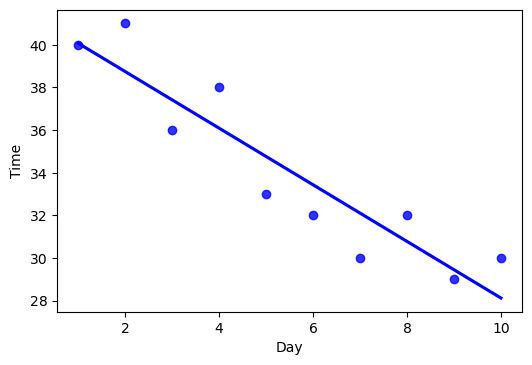

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     45.48
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000146
Time:                        12:00:50   Log-Likelihood:                -18.882
No. Observations:                  10   AIC:                             41.76
Df Residuals:                       8   BIC:                             42.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4000      1.221     33.902      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


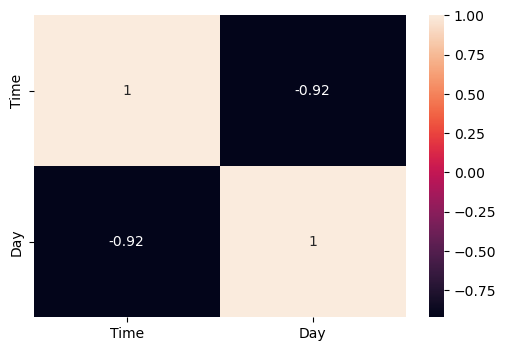

In [3]:
# Scatter Plots
y_var = df1['Time'].values
xnames = ['Day']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Time')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Time', 'Day']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
y_data = df1['Time']
X_data_ar = np.array([df1['Day']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Day'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

Regression equation:<br>
$Time = -1.3273 Day + 41.4000$<br>

<h4>(b)

In [4]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

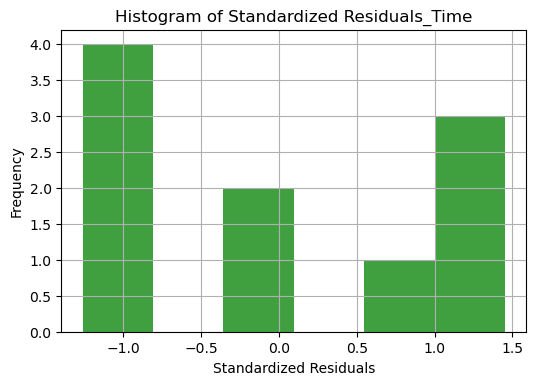

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Shapiro Test
Statistics=0.888, p=0.161


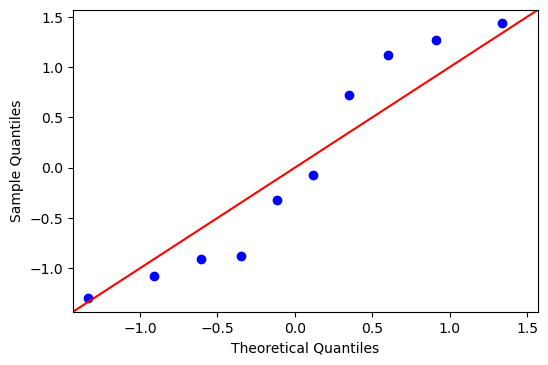

In [5]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

# Rule of five is not met. Chi_Square_for_Normality can not be conducted.
# chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
# print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.161 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

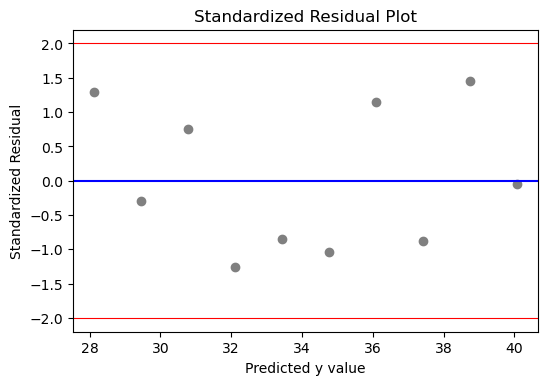

In [6]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

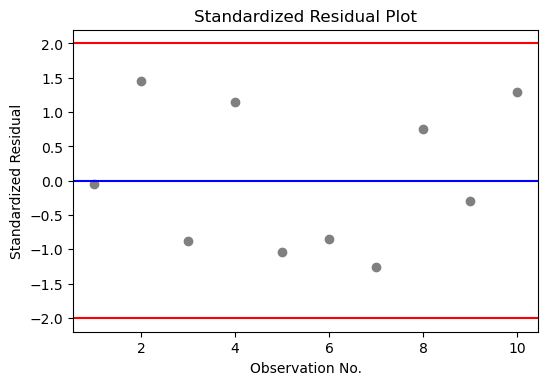

runs =  7
n1 =  5
n2 =  5
runs_exp =  6.0
stan_dev =  1.4907119849998598
z =  0.6708203932499369
pval_z =  0.5023349543605021
p_value for Z-statistic=  0.5023349543605021


In [7]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.5023349543605021 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Right-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [8]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  9.916007743216836
size =  10
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          1.50515633 -2.32872116  2.01704929 -2.18492364  0.19331013
 -0.41454364  2.01357716 -1.04393715  1.5882265 ]
d =  2.461352791370244
2.461352791370244


(T = 10, K = 1, alpha = 0.05): dl = 0.88 , du = 1.32<br>
2 < d = 2.461352791370244 < 4 - du. Thus, there is not enough evidence to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

<h4>(c)

In [9]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  1.7875834373406292
mean of y 34.1
std of y 4.1340053217188775
R-Squared =  0.8504175754029473
Adjusted R-Squared =  0.8317197723283156
F value =  45.48221906116654
SSR =  145.3363636363637 df =  1.0 MSR =  145.3363636363637
SSE =  25.563636363636313 df =  8.0 MSE =  3.195454545454539
F =  45.48221906116654
F test =  <F test: F=array([[45.48221906]]), p=0.0001459416215350079, df_denom=8, df_num=1>


The standard error of estimate is 1.7875834373406292.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.8504175754029473.<br>
85% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.8317197723283156.<br>
The adjusted coefficient of determination is 0.8317197723283156 is close to 0.8504175754029473 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 0.0001459416215350079 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h3>Second order model:

<h4>(a)

y = -2.49394 * x + 0.10606 * x^2 + 43.73333


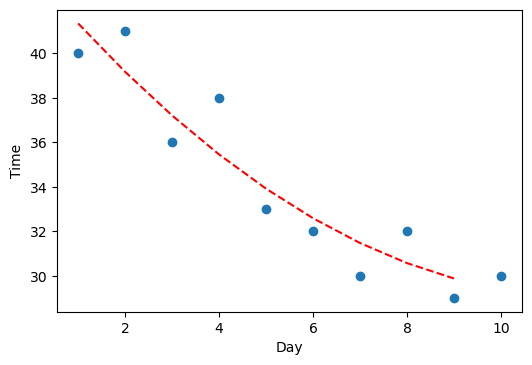

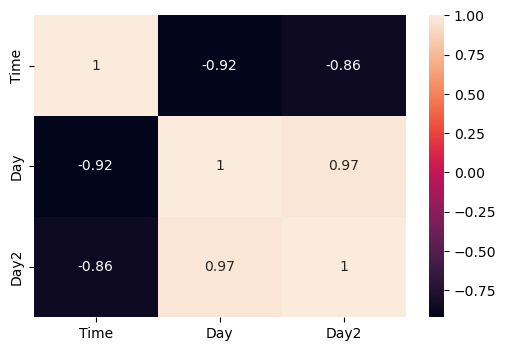

In [10]:
# Scatter Plots
def objective(x, a, b, c):
    return a * x + b * x**2 + c

y_var = df1_2['Time'].values
xnames = ['Day']
for aname in xnames:
    x_var = df1_2[aname].values
    popt, _ = curve_fit(objective, x_var, y_var)
    a, b, c = popt
    print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
    plt.scatter(x_var, y_var)
    x_line = np.arange(min(x_var), max(x_var), 1)
    y_line = objective(x_line, a, b, c)
    plt.plot(x_line, y_line, '--', color='red')
    plt.xlabel(aname)
    plt.ylabel('Time')
    plt.show()
    
# Coefficient of Correlation
df1_2['Day2'] = df1_2['Day'] ** 2
df1_2.head()
corr2b = df1_2.corr()
_ = sns.heatmap(corr2b, annot=True)

Multicollinearity is a problem.<br>
The multicollinearity can be reduced by modifying the original predictor variables:<br>
	Day = Day - average Day

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     26.98
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000513
Time:                        12:00:50   Log-Likelihood:                -17.560
No. Observations:                  10   AIC:                             41.12
Df Residuals:                       7   BIC:                             42.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2250      0.801     41.475      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


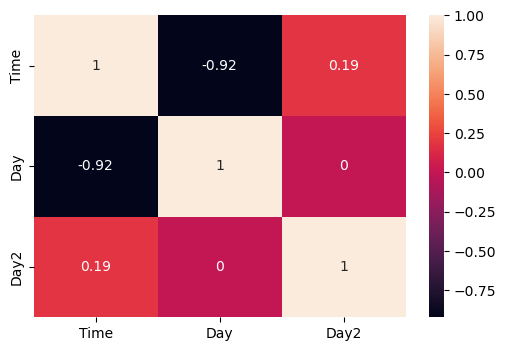

In [11]:
# Coefficient of Correlation
dep_var = df1_2['Time']
indep_var = df1_2[['Day']]
#Change the names so that we will not get confused
indep_var.columns = ['Day']
indep_mean = indep_var.mean()
indep_var = indep_var - indep_mean
indep_var['Day2'] = indep_var['Day'] ** 2
df1_2b = indep_var.copy()
df1_2b.insert(0, 'Time', dep_var)
df1_2b.head()                                                   
corr2c = df1_2b.corr()
_ = sns.heatmap(corr2c, annot=True)

# Regression
y_data_b = df1_2b['Time']
X_data_ar_b = np.array([df1_2b['Day'], df1_2b['Day2']])
X_data_b_T = X_data_ar_b.T
X_data_b = pd.DataFrame(X_data_b_T, columns = ['Day', 'Day2'])
X_data_b = sm.add_constant(X_data_b)
olsmod_b = sm.OLS(y_data_b, X_data_b)
result_reg_b = olsmod_b.fit()
print(result_reg_b.summary())

Regression equation:<br>
$Time = -1.3273 Daystd + 0.1061 Daystd ^ 2 + 3.2250$<br>

<h4>(b)

In [12]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg_b, alpha=0.05)
result_reg = result_reg_b
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

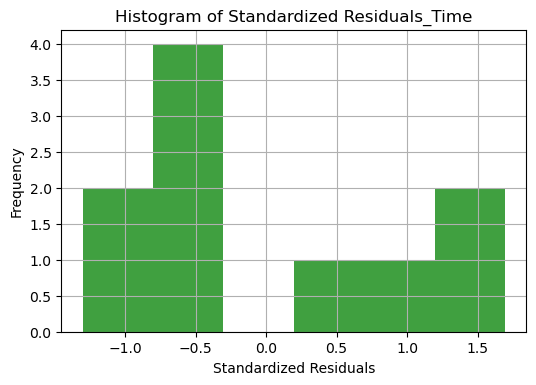

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Shapiro Test
Statistics=0.899, p=0.215


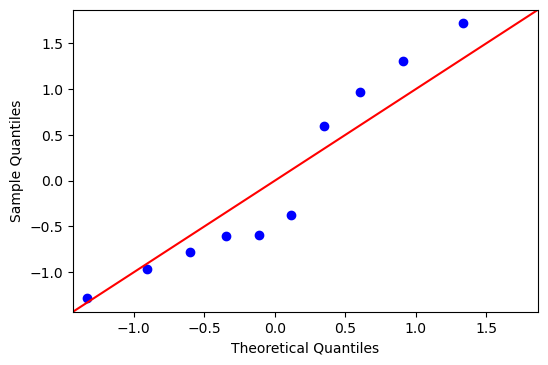

In [13]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

# Rule of five is not met. Chi_Square_for_Normality can not be conducted.
#chi2_pval = Chi_Square_for_Normality(SD, 3, 0.05) 
#print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.215 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

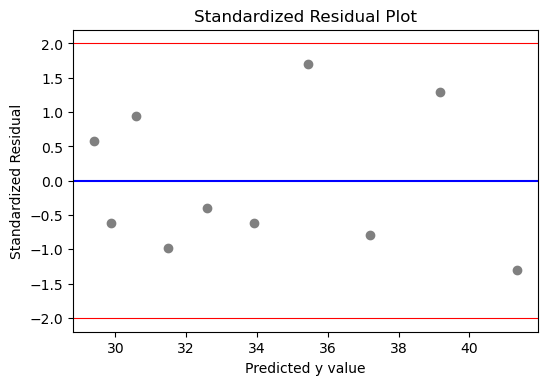

In [14]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

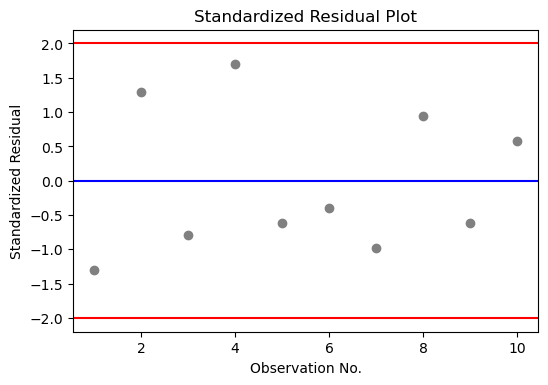

runs =  10
n1 =  5
n2 =  5
runs_exp =  6.0
stan_dev =  1.4907119849998598
z =  2.6832815729997477
pval_z =  0.007290358091535638
p_value for Z-statistic=  0.007290358091535638


In [15]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.007290358091535638 < a = 0.05, reject H0.
There is evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Right-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [16]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  9.973463123642656
size =  10
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          2.58764308 -2.08426934  2.4919695  -2.31545258  0.2219215
 -0.58198066  1.92589252 -1.56329878  1.19795361]
d =  3.0668701677557277
3.0668701677557277


(T = 10, K = 1, alpha = 0.05): dl = 0.88 , du = 1.32<br>
4 - du < d = 3.0668701677557277 < 4 - dl. Thus, it is inconclusive to infer that first order auto-correlation exists.

Most required conditions satisfied. The model is valid.

<h4>(c)

In [17]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  1.67435456324615
mean of y 34.1
std of y 4.1340053217188775
R-Squared =  0.8851711970494883
Adjusted R-Squared =  0.8523629676350564
F value =  26.980157504632462
SSR =  151.27575757575755 df =  2.0 MSR =  75.63787878787878
SSE =  19.62424242424244 df =  7.0 MSE =  2.8034632034632057
F =  26.980157504632462
F test =  <F test: F=array([[26.9801575]]), p=0.0005130715472237391, df_denom=7, df_num=2>


The standard error of estimate is 1.67435456324615.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.8851711970494883.<br>
88.5% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.8523629676350564.<br>
The adjusted coefficient of determination is 0.8523629676350564 is close to 0.8851711970494883 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 0.0005130715472237391 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

According to the results in (c) the second-order model fits better since it can explain 88.5% of the variation in y, while the first-order model can only explain 85% of the variation in y.

<h2>18.7

In [18]:
#讀取資料集
df1 = pd.read_excel('Xr18-07.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Attendance,Home %,Visiting %
0,14067,0.491,0.422
1,52488,0.563,0.574
2,12693,0.445,0.400
3,35954,0.544,0.539
4,36452,0.479,0.501


Tail of dataset:


,Attendance,Home %,Visiting %
35,26265,0.509,0.445
36,21668,0.458,0.434
37,24446,0.459,0.421
38,15316,0.404,0.425
39,49406,0.574,0.526


<h4>(a)

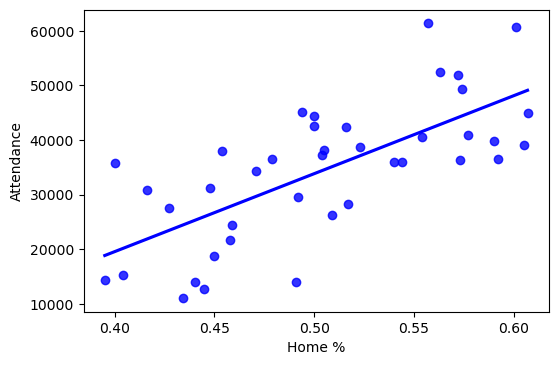

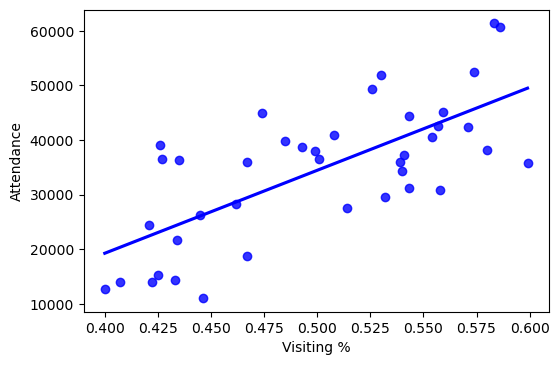

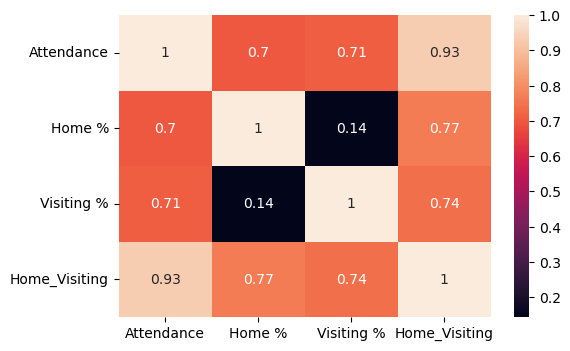

In [19]:
df1_2 = df1[['Attendance', 'Home %', 'Visiting %']]

# Scatter Plots
y_var = df1_2['Attendance'].values
xnames = ['Home %', 'Visiting %']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    plt.xlabel(aname)
    plt.ylabel('Attendance')
    plt.show()
    
# Coefficient of Correlation
df1_2['Home_Visiting'] = df1_2['Home %'] * df1_2['Visiting %']
df1_2.head()
corr2b = df1_2.corr()
_ = sns.heatmap(corr2b, annot=True)

Multicollinearity is a problem.<br>
The multicollinearity can be reduced by modifying the original predictor variables:<br>
Home % = Home % - average Home %<br>
Visiting % = Visiting % - average Visiting %

                            OLS Regression Results                            
Dep. Variable:             Attendance   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     80.65
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.82e-16
Time:                        12:00:51   Log-Likelihood:                -393.24
No. Observations:                  40   AIC:                             794.5
Df Residuals:                      36   BIC:                             801.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.445e+04    756.98

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


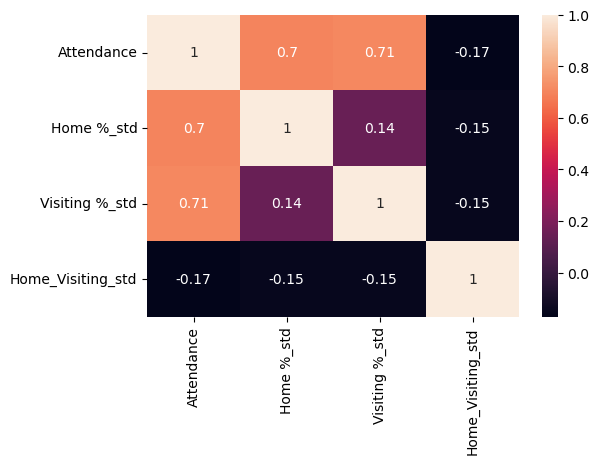

In [20]:
# Coefficient of Correlation
dep_var = df1_2['Attendance']
indep_var = df1_2[['Home %', 'Visiting %']]
#Change the names so that we will not get confused
indep_var.columns = ['Home %_std', 'Visiting %_std']
indep_mean = indep_var.mean()
indep_var = indep_var - indep_mean
indep_var['Home_Visiting_std'] = indep_var['Home %_std'] * indep_var['Visiting %_std']
df1_2b = indep_var.copy()
df1_2b.insert(0, 'Attendance', dep_var)
df1_2b.head()                                                   
corr2c = df1_2b.corr()
_ = sns.heatmap(corr2c, annot=True)

# Regression
y_data_b = df1_2b['Attendance']
X_data_ar_b = np.array([df1_2b['Home %_std'], df1_2b['Visiting %_std'], df1_2b['Home_Visiting_std']])
X_data_b_T = X_data_ar_b.T
X_data_b = pd.DataFrame(X_data_b_T, columns = ['Home %_std', 'Visiting %_std', 'Home_Visiting_std'])
X_data_b = sm.add_constant(X_data_b)
olsmod_b = sm.OLS(y_data_b, X_data_b)
result_reg_b = olsmod_b.fit()
print(result_reg_b.summary())

Regression equation:<br>
$Attendance = 1.251e+05 Home \% std + 1.336e+05 Visiting \% std + 5.32e+04 Home Visiting std + 3.445e+04$<br>

<h4>(b)

In [21]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg_b, alpha=0.05)
result_reg = result_reg_b
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

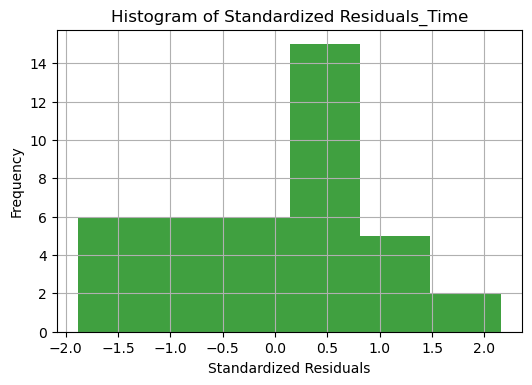

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Chi-squared test: statistics = 1.4000, p-value = 0.7055
Critical value = 7.8147 (defree of freedom = 3)
0.7055347312040918
 

Shapiro Test
Statistics=0.965, p=0.238


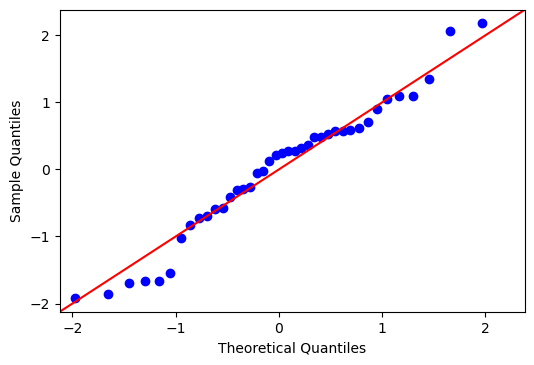

In [22]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.238 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

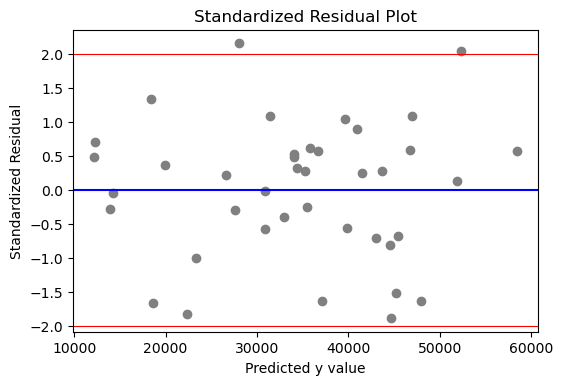

In [23]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

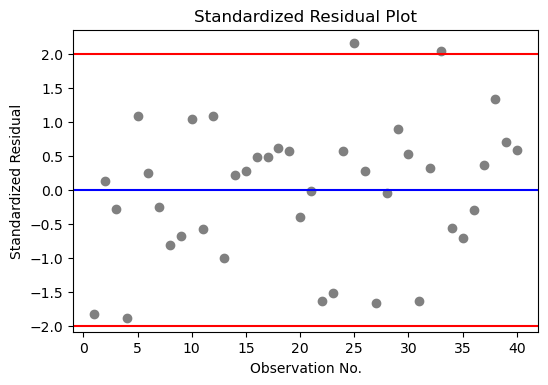

runs =  16
n1 =  20
n2 =  20
runs_exp =  21.0
stan_dev =  3.1214723679042464
z =  -1.6018081887929687
pval_z =  0.1091980316950639
p_value for Z-statistic=  0.1091980316950639


In [24]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.1091980316950639 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Left-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [25]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  38.91737865141671
size =  40
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          1.956257   -0.42493819 -1.59731785  2.96871958 -0.83829985
 -0.49108494 -0.57018783  0.14057021  1.72305831 -1.61888669  1.6573109
 -2.08209301  1.2218858   0.04853449  0.20965876  0.00606545  0.12893243
 -0.05316941 -0.96509398  0.38807724 -1.61960925  0.10722485  2.08785011
  1.58958532 -1.87326707 -1.94120977  1.61409774  0.93993572 -0.3714777
 -2.16221544  1.96182063  1.71629845 -2.60605001 -0.14017756  0.40954588
  0.66881843  0.9643978  -0.62567312 -0.1198708 ]
d =  1.8662556726350956
1.8662556726350956


(T = 40, K = 3, alpha = 0.05): dl = 1.34 , du = 1.66<br>
du < d = 1.8662556726350956 < 2. Thus, there is not enough evidence to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

In [26]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  4744.721215794406
mean of y 34478.45
std of y 12507.300715881904
R-Squared =  0.870480032905242
Adjusted R-Squared =  0.8596867023140122
F value =  80.64980735534535
SSR =  5446857188.938056 df =  3.0 MSR =  1815619062.979352
SSE =  810445658.9619436 df =  36.0 MSE =  22512379.415609546
F =  80.64980735534535
F test =  <F test: F=array([[80.64980736]]), p=4.815112131765923e-16, df_denom=36, df_num=3>


The standard error of estimate is 4744.721215794406.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.870480032905242.<br>
87% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.8596867023140122.<br>
The adjusted coefficient of determination is 0.8596867023140122 is close to 0.870480032905242 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 4.815112131765923e-16 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h2>18.19

In [27]:
#讀取資料集
df1 = pd.read_excel('Xr17-12.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Time,Boxes,Weight,Codes
0,62,126,36.05,3
1,77,154,22.94,2
2,39,96,24.86,3
3,52,127,30.54,1
4,79,151,35.57,2


Tail of dataset:


,Time,Boxes,Weight,Codes
45,36,101,14.86,1
46,77,150,50.02,1
47,63,146,40.83,1
48,50,137,7.50,1
49,59,140,17.30,1


<h4>(a)

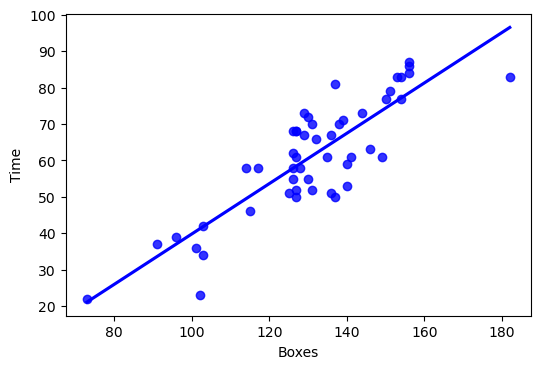

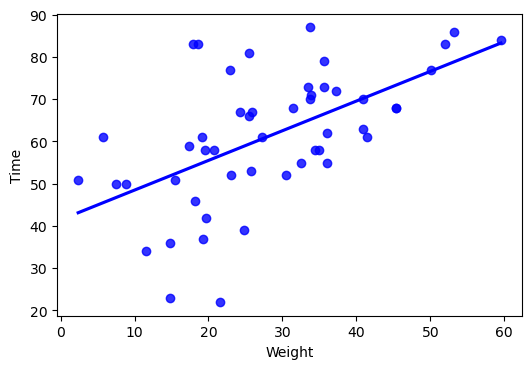

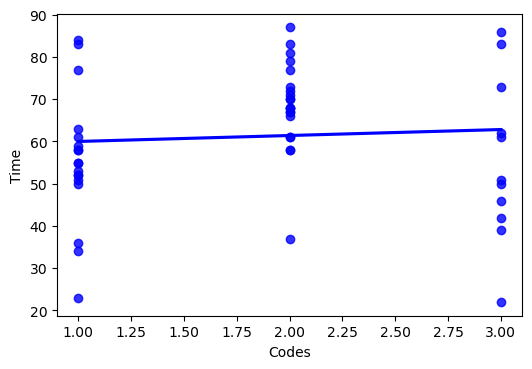

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     88.64
Date:                Wed, 11 May 2022   Prob (F-statistic):           3.87e-19
Time:                        12:00:52   Log-Likelihood:                -160.48
No. Observations:                  50   AIC:                             329.0
Df Residuals:                      46   BIC:                             336.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.4221      7.000     -5.917      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


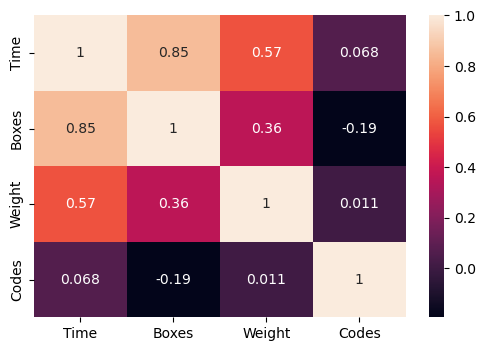

In [28]:
# Scatter Plots
y_var = df1['Time'].values
xnames = ['Boxes', 'Weight', 'Codes']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Time')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Time', 'Boxes', 'Weight', 'Codes']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
y_data = df1['Time']
X_data_ar = np.array([df1['Boxes'], df1['Weight'], df1['Codes']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Boxes', 'Weight', 'Codes'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

Regression equation:<br>
$Time = 0.6441 Boxes + 0.3495 Weight + 4.5427 Codes - 41.4221$<br>

In [29]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

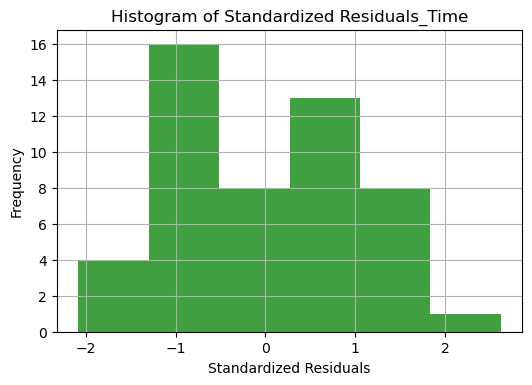

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Chi-squared test: statistics = 3.2800, p-value = 0.3504
Critical value = 7.8147 (defree of freedom = 3)
0.35043598685260946
 

Shapiro Test
Statistics=0.987, p=0.835


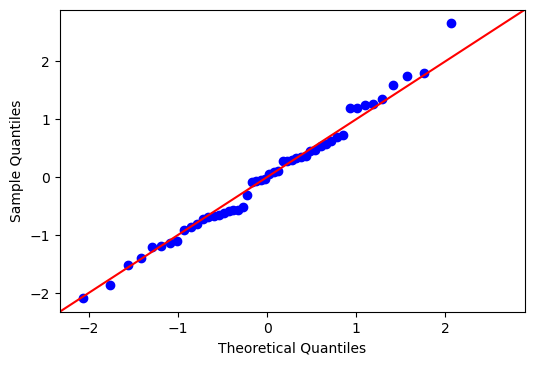

In [30]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.987 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

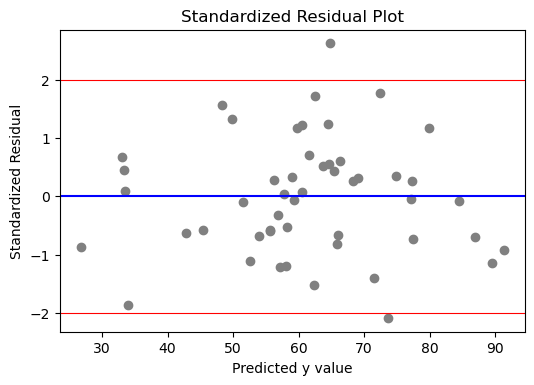

In [31]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

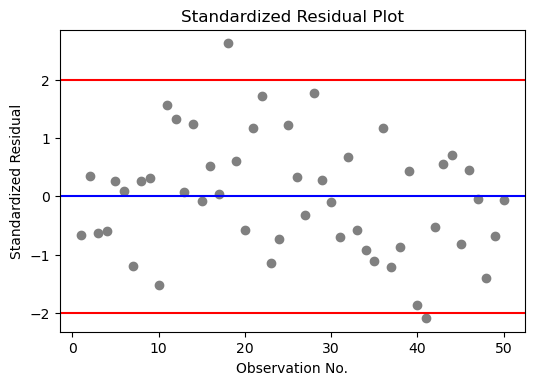

runs =  27
n1 =  25
n2 =  25
runs_exp =  26.0
stan_dev =  3.499271061118826
z =  0.2857738033247041
pval_z =  0.7750513736700824
p_value for Z-statistic=  0.7750513736700824


In [32]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.7750513736700824 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Left-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [33]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  49.345622336603185
size =  50
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
x_d =  [ 0.          1.01186342 -0.9874137   0.04334295  0.86073016 -0.18074296
 -1.28293758  1.46482919  0.04820507 -1.84259758  3.0970597  -0.24620486
 -1.24364662  1.15025895 -1.30515364  0.60072579 -0.49069088  2.58454005
 -2.02278742 -1.17919813  1.74678198  0.54552388 -2.85518416  0.40559084
  1.96193609 -0.89804873 -0.63914507  2.0778893  -1.4826592  -0.37913354
 -0.60903488  1.37957764 -1.26030828 -0.33948081 -0.18164644  2.27256051
 -2.37908121  0.34801975  1.30672106 -2.30681053 -0.22147496  1.55690661
  1.08376788  0.15585653 -1.52022905  1.25781851 -0.48476834 -1.36040729
  0.72155422  0.6190884 ]
d =  1.8822729887896215
1.8822729887896215


(T = 50, K = 3, alpha = 0.05): dl = 1.42 , du = 1.67<br>
du < d = 1.8822729887896215 < 2. Thus, there is not enough evidence to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

In [34]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  6.249146409706934
mean of y 61.22
std of y 15.608062019353973
R-Squared =  0.8525206337384722
Adjusted R-Squared =  0.8429024141996769
F value =  88.63601317268876
SSR =  10384.195780902157 df =  3.0 MSR =  3461.3985936340523
SSE =  1796.3842190978405 df =  46.0 MSE =  39.051830849953056
F =  88.63601317268876
F test =  <F test: F=array([[88.63601317]]), p=3.872821023841521e-19, df_denom=46, df_num=3>


The standard error of estimate is 6.249146409706934.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.8525206337384722.<br>
85% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.8429024141996769.<br>
The adjusted coefficient of determination is 0.8429024141996769 is close to 0.8525206337384722 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 3.872821023841521e-19 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h4>(b)

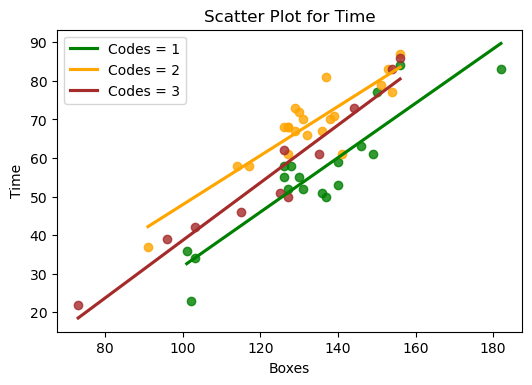

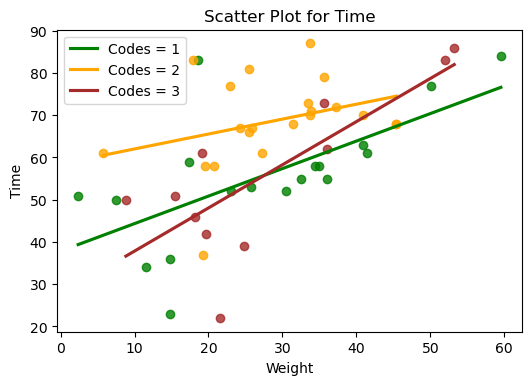

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 11 May 2022   Prob (F-statistic):           6.31e-28
Time:                        12:00:52   Log-Likelihood:                -135.30
No. Observations:                  50   AIC:                             280.6
Df Residuals:                      45   BIC:                             290.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.7180      3.727     -7.973      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


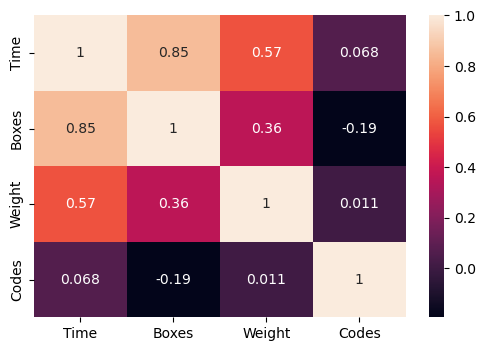

In [35]:
# Scatter Plots
y_var = df1['Time'].values
xnames = ['Boxes', 'Weight']
df1_c1 = df1[df1.Codes == 1]
df1_c2 = df1[df1.Codes == 2]
df1_c3 = df1[df1.Codes == 3]
for aname in xnames:
    _ = sns.regplot(x=aname, y= 'Time', data = df1_c1, color = 'green', ci = None)
    _ = sns.regplot(x=aname, y= 'Time', data = df1_c2, color = 'orange', ci = None)
    _ = sns.regplot(x=aname, y= 'Time', data = df1_c3, color = 'brown', ci = None)
    plt.legend(labels=['Codes = 1', 'Codes = 2', 'Codes = 3'])
    plt.title('Scatter Plot for Time')
    plt.xlabel(aname)
    plt.ylabel('Time')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Time', 'Boxes', 'Weight', 'Codes']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
color_dummy = pd.get_dummies(df1_2['Codes'], prefix = 'Codes')
df1_2 = pd.concat([df1, color_dummy], axis = 1)
df1_2.head()

y_data_5b = df1_2['Time']
X_data_ar_5b = np.array([df1_2['Boxes'], df1_2['Weight'], df1_2['Codes_1'], df1_2['Codes_2']])
X_data_5b_T = X_data_ar_5b.T
X_data_5b = pd.DataFrame(X_data_5b_T, columns = ['Boxes', 'Weight', 'Codes_1', 'Codes_2'])
X_data_5b = sm.add_constant(X_data_5b)
olsmod_5b = sm.OLS(y_data_5b, X_data_5b)
result_reg_5b = olsmod_5b.fit()
print(result_reg_5b.summary())

Regression equation:<br>
$Time = 0.6177 Boxes + 0.3464 Weight - 6.7556 Codes 1 + 6.4800 Codes 2 - 29.7180$<br>

In [36]:
# Standardized Residuals
result_reg = result_reg_5b
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

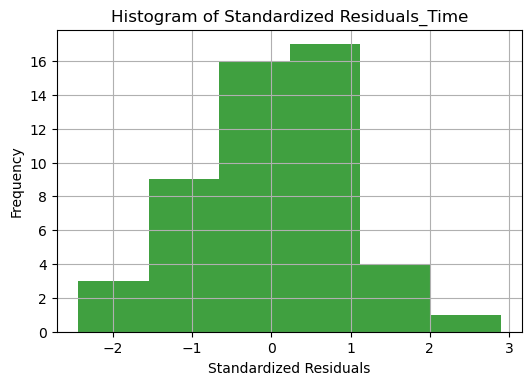

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Chi-squared test: statistics = 1.3600, p-value = 0.7149
Critical value = 7.8147 (defree of freedom = 3)
0.7149371448732529
 

Shapiro Test
Statistics=0.981, p=0.608


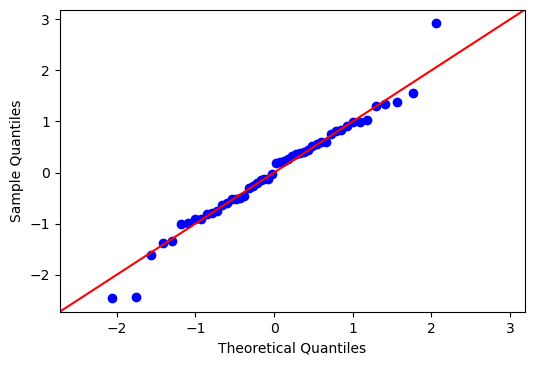

In [37]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.7149371448732529 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

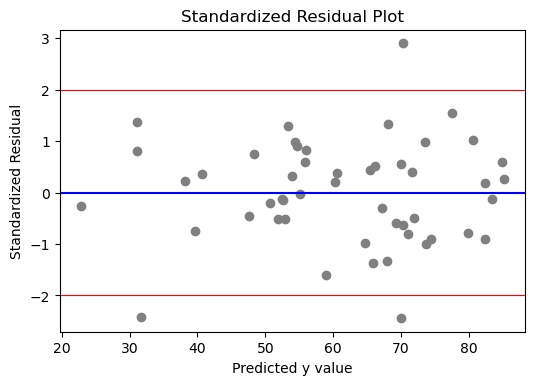

In [38]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

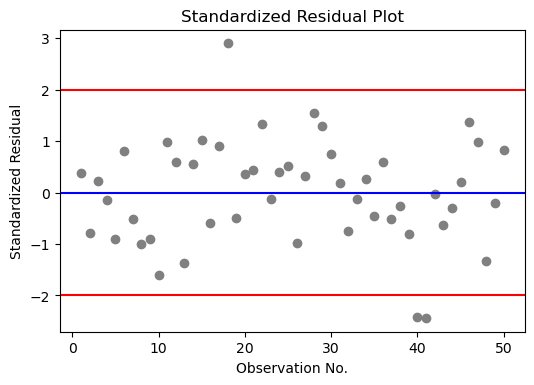

runs =  25
n1 =  25
n2 =  25
runs_exp =  26.0
stan_dev =  3.499271061118826
z =  -0.2857738033247041
pval_z =  0.7750513736700824
p_value for Z-statistic=  0.7750513736700824


In [39]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.7750513736700824 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Left-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [40]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  49.27611359410298
size =  50
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
x_d =  [ 0.         -1.16574519  1.00682604 -0.37720571 -0.76102253  1.71231427
 -1.31569738 -0.4760888   0.08666855 -0.69377414  2.58054189 -0.38754175
 -1.97274181  1.92536299  0.46438526 -1.59668896  1.48369465  1.99824655
 -3.39925964  0.85332397  0.07949809  0.90894631 -1.46198131  0.52276969
  0.11507215 -1.49310214  1.29047567  1.22509156 -0.25013558 -0.53795137
 -0.56967978 -0.93234604  0.63239694  0.38769949 -0.71447719  1.04552724
 -1.10780562  0.25645539 -0.5585057  -1.60032652 -0.02613684  2.41140889
 -0.60669463  0.32392851  0.50911848  1.17779856 -0.40452628 -2.29983498
  1.11586384  1.02807218]
d =  1.5490431329248229
1.5490431329248229


(T = 50, K = 3, alpha = 0.05): dl = 1.42 , du = 1.67<br>
dl < d = 1.5490431329248229 < du. Thus, it is inconclusive to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

In [41]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  3.817886179766192
mean of y 61.22
std of y 15.608062019353973
R-Squared =  0.9461494058842653
Adjusted R-Squared =  0.9413626864073111
F value =  197.6613441501074
SSR =  11524.648530325765 df =  4.0 MSR =  2881.1621325814413
SSE =  655.9314696742358 df =  45.0 MSE =  14.576254881649685
F =  197.6613441501074
F test =  <F test: F=array([[197.66134415]]), p=6.3076033492009355e-28, df_denom=45, df_num=4>


The standard error of estimate is 3.817886179766192.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.9461494058842653.<br>
94.6% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.9413626864073111.<br>
The adjusted coefficient of determination is 0.9413626864073111 is close to 0.9461494058842653 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 6.3076033492009355e-28 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h4>(c)

According to the analysis above, 94.6% of the variation in y is explained by the latter regression line of the independent variables, while only  85% of the variation in y is explained by the previous regression line
of the independent variables. Thus, the latter model fits better.

<h4>(d)

Yes, according to the Regression Results in the latter one, time of day are highly related to the time to unload.

<h2>18.23

In [42]:
#讀取資料集
df1 = pd.read_excel('Xr18-23.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Absent,Wage,Pct PT,Pct U,Av Shift,UM Rel
0,5.4,22477,8.5,57.1,1,1
1,4.1,29939,1.9,41.5,0,1
2,11.5,22957,12.2,52.6,1,0
3,2.1,18888,30.8,65.1,0,1
4,5.9,15078,6.8,68.8,0,1


Tail of dataset:


,Absent,Wage,Pct PT,Pct U,Av Shift,UM Rel
95,2.7,28878,7.4,12.2,1,1
96,8.0,24558,24.5,37.0,1,1
97,4.2,20447,0.9,27.4,1,1
98,9.0,27714,8.7,58.1,0,0
99,7.7,18116,3.5,47.5,1,1


<h4>(a)

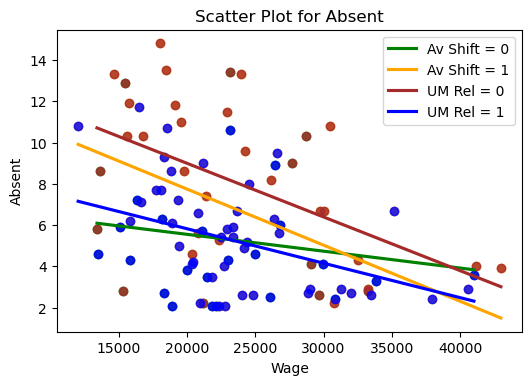

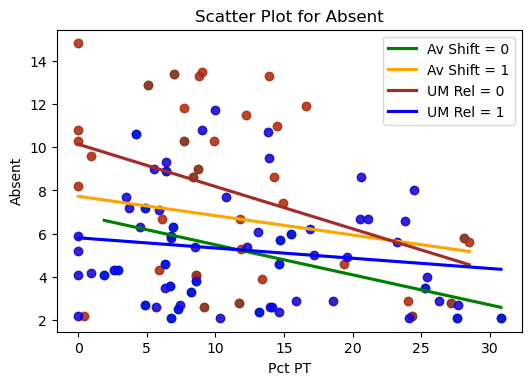

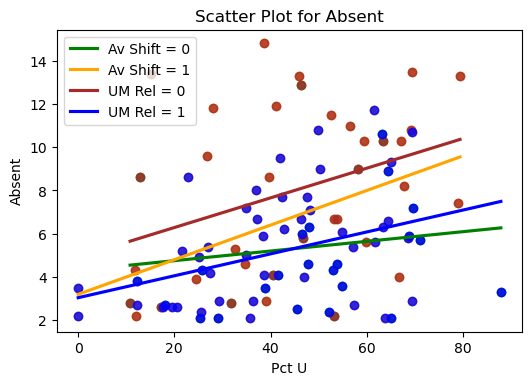

                            OLS Regression Results                            
Dep. Variable:                 Absent   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     21.40
Date:                Wed, 11 May 2022   Prob (F-statistic):           3.08e-14
Time:                        12:00:53   Log-Likelihood:                -224.49
No. Observations:                 100   AIC:                             461.0
Df Residuals:                      94   BIC:                             476.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2648      1.172      8.756      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


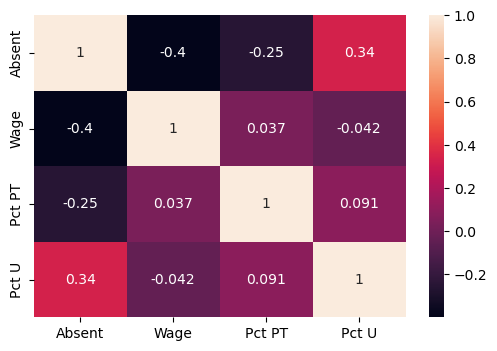

In [43]:
# Scatter Plots
y_var = df1['Absent'].values
xnames = ['Wage', 'Pct PT', 'Pct U']
df1_c1 = df1[df1['Av Shift'] == 0]
df1_c2 = df1[df1['Av Shift'] == 1]
df1_c3 = df1[df1['UM Rel'] == 0]
df1_c4 = df1[df1['UM Rel'] == 1]
for aname in xnames:
    _ = sns.regplot(x=aname, y= 'Absent', data = df1_c1, color = 'green', ci = None)
    _ = sns.regplot(x=aname, y= 'Absent', data = df1_c2, color = 'orange', ci = None)
    _ = sns.regplot(x=aname, y= 'Absent', data = df1_c3, color = 'brown', ci = None)
    _ = sns.regplot(x=aname, y= 'Absent', data = df1_c4, color = 'blue', ci = None)
    plt.legend(labels=['Av Shift = 0', 'Av Shift = 1', 'UM Rel = 0', 'UM Rel = 1'])
    plt.title('Scatter Plot for Absent')
    plt.xlabel(aname)
    plt.ylabel('Absent')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Absent', 'Wage', 'Pct PT', 'Pct U']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
y_data_5b = df1['Absent']
X_data_ar_5b = np.array([df1['Wage'], df1['Pct PT'], df1['Pct U'], df1['Av Shift'], df1['UM Rel']])
X_data_5b_T = X_data_ar_5b.T
X_data_5b = pd.DataFrame(X_data_5b_T, columns = ['Wage', 'Pct PT', 'Pct U', 'Av Shift', 'UM Rel'])
X_data_5b = sm.add_constant(X_data_5b)
olsmod_5b = sm.OLS(y_data_5b, X_data_5b)
result_reg_5b = olsmod_5b.fit()
print(result_reg_5b.summary())

Regression equation:<br>
$Absent = - 0.0002 Wage - 0.1069 Pct PT + 0.0599 Pct U + 1.5619 Av Shift - 2.6366 UM Rel + 10.2648$<br>

In [44]:
# Standardized Residuals
result_reg = result_reg_5b
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

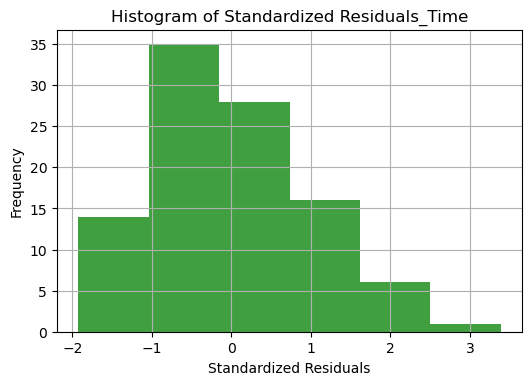

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Chi-squared test: statistics = 4.0400, p-value = 0.2572
Critical value = 7.8147 (defree of freedom = 3)
0.25717712125508085
 

Shapiro Test
Statistics=0.974, p=0.043


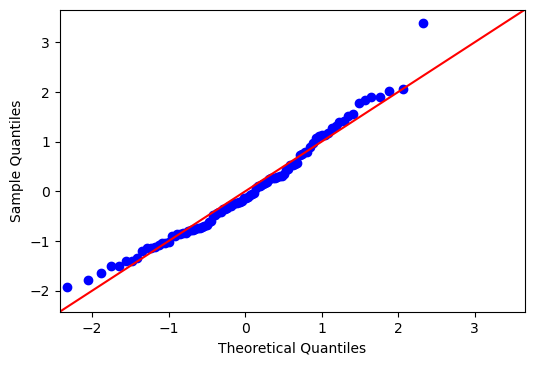

In [45]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.25717712125508085 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

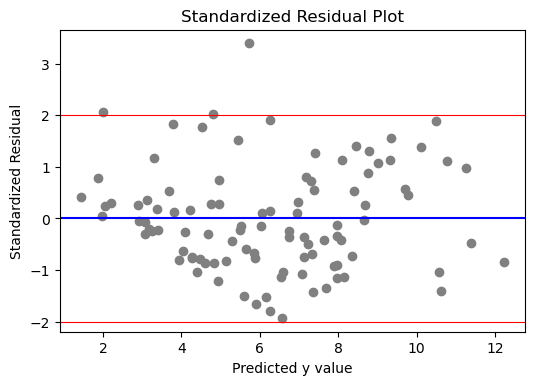

In [46]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

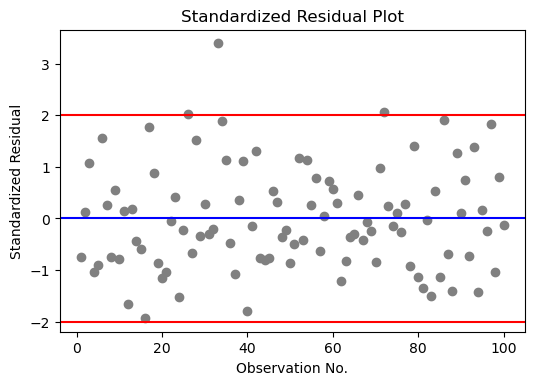

runs =  62
n1 =  50
n2 =  50
runs_exp =  51.0
stan_dev =  4.97468338163091
z =  2.211196001059617
pval_z =  0.027022267193960985
p_value for Z-statistic=  0.027022267193960985


In [47]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.027022267193960985 < a = 0.05, reject H0.
There is evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Right-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [48]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  100.20733126964316
size =  100
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_d =  [ 0.          0.86670639  0.95643314 -2.10652862  0.12514267  2.46447919
 -1.29111332 -1.01155059  1.29091136 -1.32472602  0.92108243 -1.79852194
  1.83699662 -0.62458697 -0.15315475 -1.33349795  3.7074047  -0.89220903
 -1.74401942 -0.29798105  0.11267037  0.99387204  0.4725676  -1.9409127
  1.30061204  2.23067776 -2.69014245  2.18944998 -1.84923165  0.60875973
 -0.56632404  0.08671266  3.59475261 -1.49915566 -0.76101183 -1.60472585
 -0.60863933  1.43628696  0.76147346 -2.90930774  1.65722994  1.44706042
 -2.08018952 -0.02554394  0.02206188  1.30496826 -0.21554557 -0.67557227
  0.13937477 -0.64531393  0.38082963  1.65375473 -

(T = 100, K = 5, alpha = 0.05): dl = 1.57 , du = 1.78<br>
2 < d = 2.226112556212199 < 4 - du. Thus, there is not enough evidence to infer that first order auto-correlation exists.

Most required conditions satisfied. The model is valid.

In [49]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  2.355889758224149
mean of y 6.232
std of y 3.3400862264318865
R-Squared =  0.532348399690798
Adjusted R-Squared =  0.5074733145679681
F value =  21.40086745682001
SSR =  593.8972440268888 df =  5.0 MSR =  118.77944880537775
SSE =  521.7203559731113 df =  94.0 MSE =  5.5502165529054395
F =  21.40086745682001
F test =  <F test: F=array([[21.40086746]]), p=3.083953499655928e-14, df_denom=94, df_num=5>


The standard error of estimate is 2.355889758224149.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.532348399690798.<br>
94.6% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.5074733145679681.<br>
The adjusted coefficient of determination is 0.5074733145679681 is close to 0.532348399690798 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 3.083953499655928e-14 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h4>(b)

Yes, according to the Regression Results, we can infer at the 5% significance level that the availability of shiftwork is related to absenteeism.

<h4>(c)

Yes, according to the Regression Results they have negative relationships there is enough evidence at the 5% significance level to infer that in organizations where the union–management relationship is good, absenteeism is lower.

<h2>18.36

In [50]:
# Assigning your own values to each factor and to the weights.

df1 = pd.read_excel('Pay Equity.xls')

display(df1)

,Pay Equity Calculations,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Factors,Weight,Maintenance,Security,Gardener,Technician,Cleaner,Secretary,Bookstore,Cafeteria
2,Knowledge & training,0.25,3,3,3,9,1,6,4,3
3,Responsibility,0.25,2,7,1,7,4,7,7,2
4,Mental Effort,0.15,2,3,1,8,2,6,7,4
5,Physical Effort,0.15,7,3,6,4,7,3,2,5
6,Working Conditions,0.2,7,4,8,1,5,1,1,6
7,Total score,NaN,4,4.2,3.65,6,3.6,4.8,4.3,3.8
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Job Categories,Pay Rate,Score,Gender,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df1 = pd.read_excel('18_36.xlsx')

display(df1)

,Job Categories,Pay Rate,Score,Gender
0,Maintenance,13.55,4.00,1
1,Security,15.65,4.20,1
2,Gardener,13.80,3.65,1
3,Technician,19.90,6.00,1
4,Cleaner,11.85,3.60,0
5,Secretary,14.75,4.80,0
6,Bookstore,18.90,4.30,0
7,Cafeteria,13.30,3.80,0


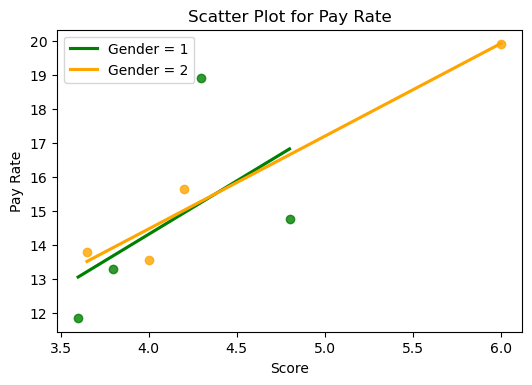

                            OLS Regression Results                            
Dep. Variable:               Pay Rate   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     4.245
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0836
Time:                        12:00:54   Log-Likelihood:                -15.143
No. Observations:                   8   AIC:                             36.29
Df Residuals:                       5   BIC:                             36.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1867      4.553      0.700      0.5

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


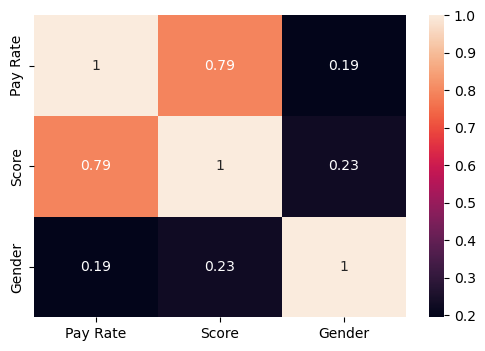

In [52]:
# Scatter Plots
y_var = df1['Pay Rate'].values
xnames = ['Score']
df1_c1 = df1[df1.Gender == 0]
df1_c2 = df1[df1.Gender == 1]
for aname in xnames:
    _ = sns.regplot(x=aname, y= 'Pay Rate', data = df1_c1, color = 'green', ci = None)
    _ = sns.regplot(x=aname, y= 'Pay Rate', data = df1_c2, color = 'orange', ci = None)
    plt.legend(labels=['Gender = 1', 'Gender = 2'])
    plt.title('Scatter Plot for Pay Rate')
    plt.xlabel(aname)
    plt.ylabel('Pay Rate')
    plt.show()

# Coefficient of Correlation
df1_2 = df1[['Pay Rate', 'Score', 'Gender']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
color_dummy = pd.get_dummies(df1['Gender'], prefix = 'Gender')
df1_2 = pd.concat([df1_2, color_dummy], axis = 1)
df1_2.head()

y_data_5b = df1_2['Pay Rate']
X_data_ar_5b = np.array([df1_2['Score'], df1_2['Gender_0']])
X_data_5b_T = X_data_ar_5b.T
X_data_5b = pd.DataFrame(X_data_5b_T, columns = ['Score', 'Gender_0'])
X_data_5b = sm.add_constant(X_data_5b)
olsmod_5b = sm.OLS(y_data_5b, X_data_5b)
result_reg_5b = olsmod_5b.fit()
print(result_reg_5b.summary())

Regression equation:<br>
$Pay Rate = 2.8097 Score - 0.0767 Gender_0 + 3.1867$<br>

In [53]:
# Standardized Residuals
result_reg = result_reg_5b
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

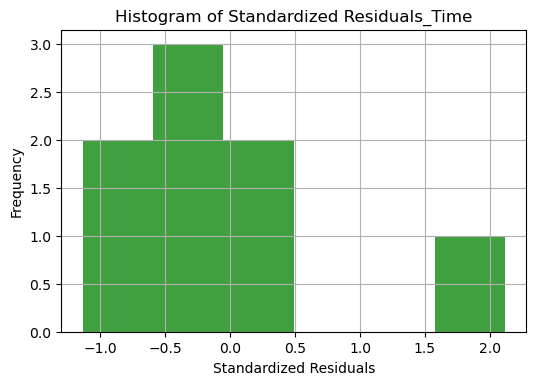

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Shapiro Test
Statistics=0.881, p=0.191


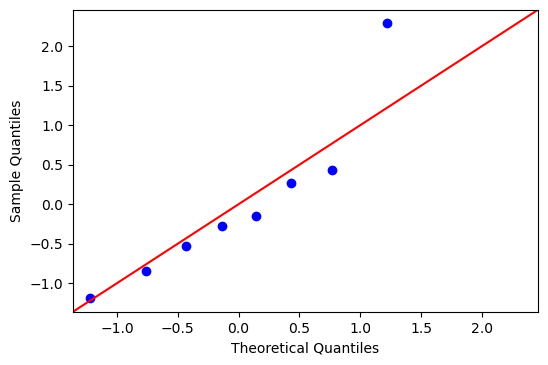

In [54]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

# Rule of five is not met. Cannot conduct Chi_Square_for_Normality
#chi2_pval = Chi_Square_for_Normality(SD, 3, 0.05) 
#print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.191 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

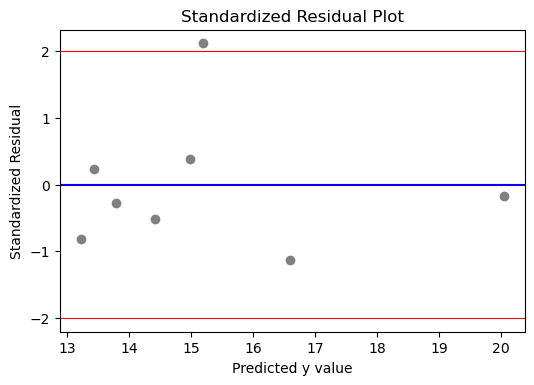

In [55]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

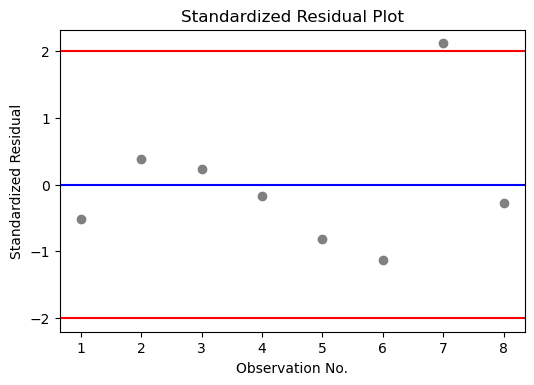

runs =  5
n1 =  4
n2 =  4
runs_exp =  5.0
stan_dev =  1.3093073414159542
z =  0.0
pval_z =  1.0
p_value for Z-statistic=  1.0


In [56]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 1.0 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Right-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [57]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  7.012994109242831
size =  8
x_d =  [0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          0.89618905 -0.15178391 -0.39534254 -0.6517845  -0.31703287
  3.25296947 -2.39920985]
d =  2.544682024430564
2.544682024430564


(T = 8, K = 2, alpha = 0.05): dl = 0.559 , du = 1.777<br>
4 - du < d = 2.544682024430564 < 4-dl. Thus, it is inconclusive to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

In [58]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  2.0319058574120095
mean of y 15.212500000000002
std of y 2.6386253523378413
R-Squared =  0.6293775521546503
Adjusted R-Squared =  0.48112857301651046
F value =  4.245409012686622
SSR =  35.05554293307381 df =  2.0 MSR =  17.527771466536905
SSE =  20.643207066926166 df =  5.0 MSE =  4.128641413385234
F =  4.245409012686622
F test =  <F test: F=array([[4.24540901]]), p=0.0836236847722874, df_denom=5, df_num=2>


The standard error of estimate is 2.0319058574120095.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.6293775521546503.<br>
62.9% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.48112857301651046.<br>
The adjusted coefficient of determination is 0.48112857301651046 is close to 0.6293775521546503 (>= 0.06), indicating that the model has problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 0.0836236847722874 > 0.05, the null hypothesis is not rejected. Thus, we can not conclude that at least one independent variable is related to y. However, according to the p-value by t test, we can know that price is related to y, while gender is not.<br>

We can conclude that gender is not related to the pay rate, and the pay rate can be mostly explained by the job scores (about 62.9%).

<h2>18.38

In [59]:
#讀取資料集
df1 = pd.read_excel('Xr17-16.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,DEFINITE,DAYS1,DAYS2,DAYS3,DAYS4,DAYS5,DAYS6
0,10,0,0,0,0,0,7
1,10,0,0,3,3,0,0
2,10,3,0,1,0,2,3
3,5,3,0,5,7,1,0
4,10,7,0,3,3,4,0


Tail of dataset:


,DEFINITE,DAYS1,DAYS2,DAYS3,DAYS4,DAYS5,DAYS6
887,10,5,5,5,6,0,0
888,5,7,7,0,1,0,0
889,10,5,5,0,0,0,0
890,10,7,5,7,0,0,5
891,8,4,7,0,0,0,0


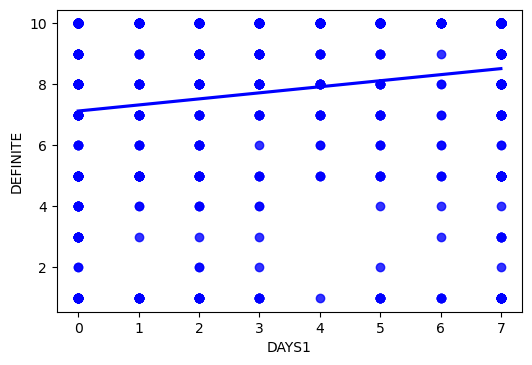

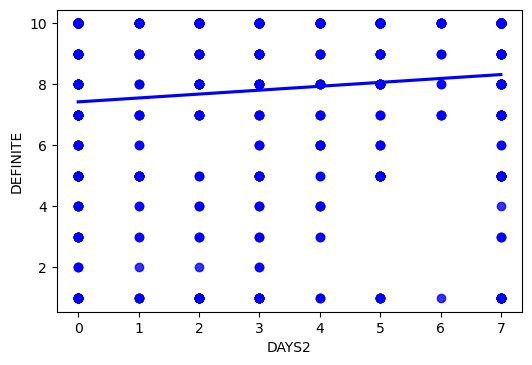

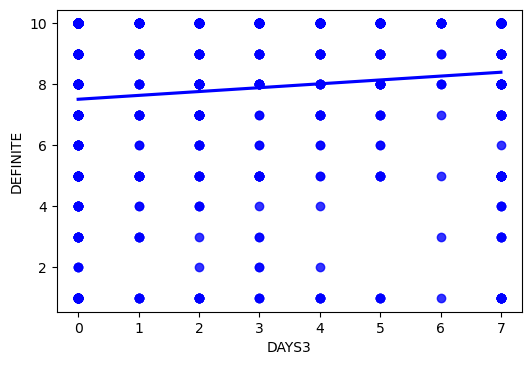

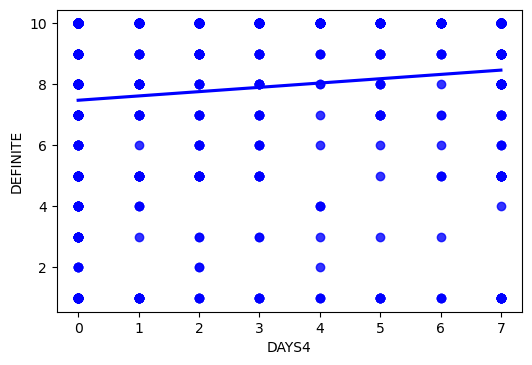

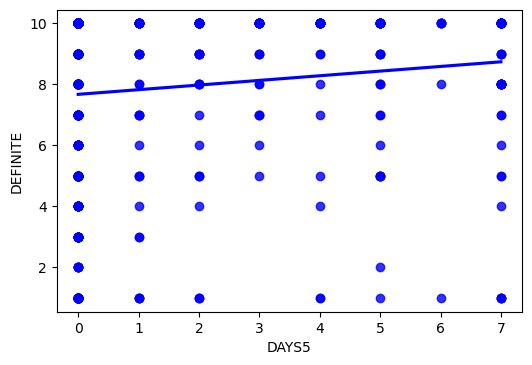

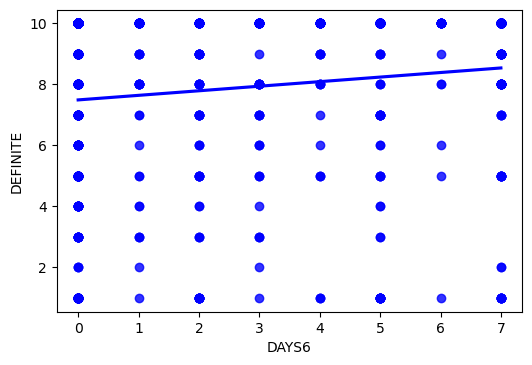

                            OLS Regression Results                            
Dep. Variable:               DEFINITE   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     11.72
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.16e-12
Time:                        12:00:55   Log-Likelihood:                -2199.2
No. Observations:                 892   AIC:                             4412.
Df Residuals:                     885   BIC:                             4446.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3646      0.205     31.099      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


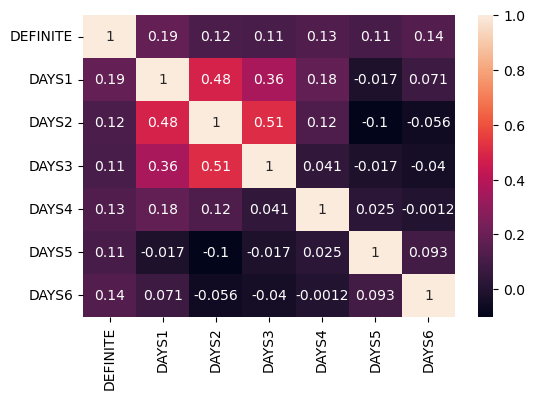

In [60]:
#Scatter Plots
y_var = df1['DEFINITE'].values
xnames = ['DAYS1', 'DAYS2', 'DAYS3', 'DAYS4', 'DAYS5', 'DAYS6']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    plt.xlabel(aname)
    plt.ylabel('DEFINITE')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['DEFINITE', 'DAYS1', 'DAYS2', 'DAYS3', 'DAYS4', 'DAYS5', 'DAYS6']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

# Regression
y_data = df1['DEFINITE']
X_data_ar = np.array([ df1['DAYS1'], df1['DAYS2'], df1['DAYS3'], df1['DAYS4'], df1['DAYS5'], df1['DAYS6'] ])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['DAYS1', 'DAYS2', 'DAYS3', 'DAYS4', 'DAYS5', 'DAYS6'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

In [61]:
def forward_selection(input_df, depv="y", indepv = ["x1"]):
    selected = []
    candidates = indepv.copy()
    best_adjr2 = -1
    best_subset = []
    while len(candidates) > 0:
        print("Current Candidates: ", candidates)
        tmp_indep_subset = []
        tmp_model_adjr = []
        tmp_model_nindep = []
        for acandidate in candidates:
            tmplist = selected.copy()
            tmplist.append(acandidate)
            modelstr = depv + " ~ " + "+".join(tmplist)
            result6tmp = smf.ols(modelstr, data=input_df).fit()
            tmp_indep_subset.append(tmplist)
            tmp_model_adjr.append(result6tmp.rsquared_adj)
            tmp_model_nindep.append(len(tmplist))
        tmp_adjr2 = np.array(tmp_model_adjr)
        tmpind = tmp_adjr2.argmax()
        this_adjr2 = tmp_adjr2[tmpind]
        selected = tmp_indep_subset[tmpind]
        if this_adjr2 <= 0:
            raise("Encounterd negative Adj R2. Stop.")
        print("===============")
        print("Current best model: ", selected)
        print("Current best AdjR2: ", this_adjr2)
        if this_adjr2 > best_adjr2:
            #print(" best result updated")
            best_adjr2 = this_adjr2
            best_subset = selected
        candidates = set(candidates) - set(selected)
        candidates = list(candidates)
    print("best_adjr2 = ", best_adjr2)
    print("best_subset = ", best_subset)
    modelstr = depv + " ~ " + "+".join(best_subset)
    result6b = smf.ols(modelstr, data=input_df).fit()
    print(result6b.summary()) 

forward_selection(input_df = df1, depv = 'DEFINITE', indepv = ['DAYS1', 'DAYS2', 'DAYS3', 'DAYS4', 'DAYS5', 'DAYS6'])

Current Candidates:  ['DAYS1', 'DAYS2', 'DAYS3', 'DAYS4', 'DAYS5', 'DAYS6']
Current best model:  ['DAYS1']
Current best AdjR2:  0.033572617717638975
Current Candidates:  ['DAYS4', 'DAYS5', 'DAYS3', 'DAYS2', 'DAYS6']
Current best model:  ['DAYS1', 'DAYS6']
Current best AdjR2:  0.047608238223797006
Current Candidates:  ['DAYS5', 'DAYS4', 'DAYS2', 'DAYS3']
Current best model:  ['DAYS1', 'DAYS6', 'DAYS4']
Current best AdjR2:  0.056642285730147734
Current Candidates:  ['DAYS5', 'DAYS2', 'DAYS3']
Current best model:  ['DAYS1', 'DAYS6', 'DAYS4', 'DAYS5']
Current best AdjR2:  0.0648394608409355
Current Candidates:  ['DAYS3', 'DAYS2']
Current best model:  ['DAYS1', 'DAYS6', 'DAYS4', 'DAYS5', 'DAYS3']
Current best AdjR2:  0.06766517784525972
Current Candidates:  ['DAYS2']
Current best model:  ['DAYS1', 'DAYS6', 'DAYS4', 'DAYS5', 'DAYS3', 'DAYS2']
Current best AdjR2:  0.06730270416755935
best_adjr2 =  0.06766517784525972
best_subset =  ['DAYS1', 'DAYS6', 'DAYS4', 'DAYS5', 'DAYS3']
               

<h4>(a)

Regression equation:<br>
$DEFINITE = 0.1470 DAYS 1 + 0.1320 DAYS 6 + 0.1092 DAYS 4 + 0.1379 DAYS 5 + 0.0744 DAYS 3 + 6.4057$<br>

<h2>(b)

The R-squared are similar. So most of the variation in y is explained by the latter regression line of the independent variables at the similar percentage.<br>
However, the Adj. R-squared value is slightly smaller than the previous one and we use less independent variables which implies a better solution that avoids overfitting.

<h2>18.49

In [62]:
#讀取資料集
df1 = pd.read_excel('Xr18-49.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Pct Dep,Temperature,PH Level,Weather
0,32.6,60,6.6,2
1,40.4,65,6.6,2
2,39.4,70,6.6,2
3,37.3,75,6.6,2
4,45.1,80,6.6,2


Tail of dataset:


,Pct Dep,Temperature,PH Level,Weather
205,33.6,70,8.4,1
206,34.9,75,8.4,1
207,36.4,80,8.4,1
208,34.8,85,8.4,1
209,42.6,90,8.4,1


<h4>(a),(b),(c)

Multicollinearity is a problem.<br>
The multicollinearity can be reduced by modifying the original predictor variables:<br>
	Temperature = Temperature - average Temperature<br>
    PH Level = PH Level - average PH Level<br>
    PH Level2 = PH Level2 - average PH Level2

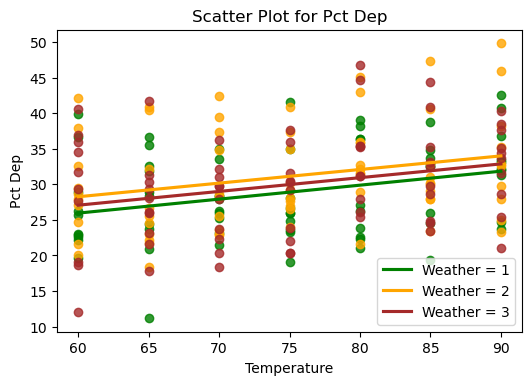

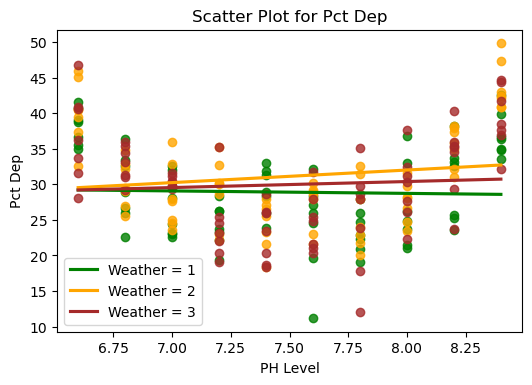

                            OLS Regression Results                            
Dep. Variable:                Pct Dep   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     77.00
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.50e-45
Time:                        12:00:56   Log-Likelihood:                -593.23
No. Observations:                 210   AIC:                             1198.
Df Residuals:                     204   BIC:                             1219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.1013      0.592     40.744      

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


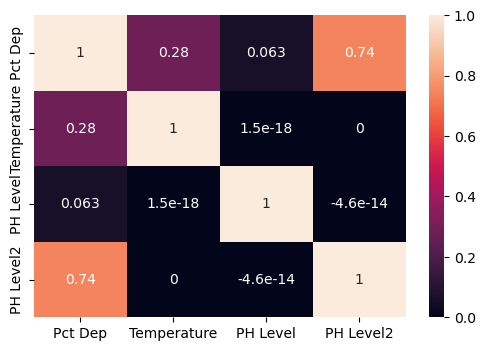

In [63]:
# Scatter Plots
y_var = df1['Pct Dep'].values
xnames = ['Temperature', 'PH Level']
df1_c1 = df1[df1.Weather == 1]
df1_c2 = df1[df1.Weather == 2]
df1_c3 = df1[df1.Weather == 3]
for aname in xnames:
    _ = sns.regplot(x=aname, y= 'Pct Dep', data = df1_c1, color = 'green', ci = None)
    _ = sns.regplot(x=aname, y= 'Pct Dep', data = df1_c2, color = 'orange', ci = None)
    _ = sns.regplot(x=aname, y= 'Pct Dep', data = df1_c3, color = 'brown', ci = None)
    plt.legend(labels=['Weather = 1', 'Weather = 2', 'Weather = 3'])
    plt.title('Scatter Plot for Pct Dep')
    plt.xlabel(aname)
    plt.ylabel('Pct Dep')
    plt.show()

# Coefficient of Correlation
dep_var = df1['Pct Dep']
indep_var = df1[['Temperature', 'PH Level']]
#Change the names so that we will not get confused
indep_var.columns = ['Temperature', 'PH Level']
indep_mean = indep_var.mean()
indep_var = indep_var - indep_mean
indep_var['PH Level2'] = indep_var['PH Level'] ** 2
df1_2b = indep_var.copy()
df1_2b.insert(0, 'Pct Dep', dep_var)
df1_2b.head()                                                   
corr2c = df1_2b.corr()
_ = sns.heatmap(corr2c, annot=True)

# Regression
color_dummy = pd.get_dummies(df1['Weather'], prefix = 'Weather')
df1_2 = pd.concat([df1_2b, color_dummy], axis = 1)
df1_2.head()
df1_2['PH Level2'] = df1_2['PH Level'] ** 2

y_data_5b = df1_2['Pct Dep']
X_data_ar_5b = np.array([df1_2['Temperature'], df1_2['PH Level'], df1_2['PH Level2'], df1_2['Weather_1'], df1_2['Weather_2']])
X_data_5b_T = X_data_ar_5b.T
X_data_5b = pd.DataFrame(X_data_5b_T, columns = ['Temperature', 'PH Level', 'PH Level2', 'Weather_1', 'Weather_2'])
X_data_5b = sm.add_constant(X_data_5b)
olsmod_5b = sm.OLS(y_data_5b, X_data_5b)
result_reg_5b = olsmod_5b.fit()
print(result_reg_5b.summary())

Regression equation:<br>
$Pct Dep = 0.1938 Temperature + 0.7571 PH Level + 17.7579 PH Level ^ 2 - 1.0686 Weather 1  + 1.1571 Weather 2 + 24.1013$<br>

In [64]:
# Standardized Residuals
result_reg = result_reg_5b
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

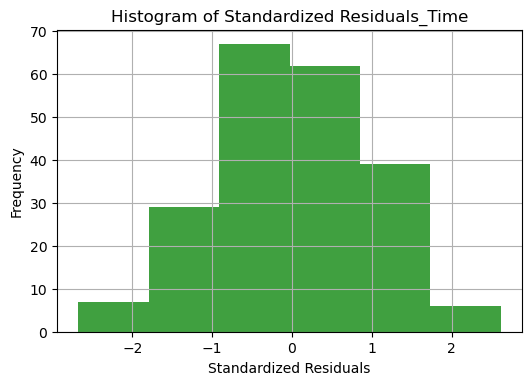

Chi-squared test: statistics = 3.1429, p-value = 0.3701
Critical value = 7.8147 (defree of freedom = 3)
0.3701195345798339
 

Shapiro Test
Statistics=0.996, p=0.827


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


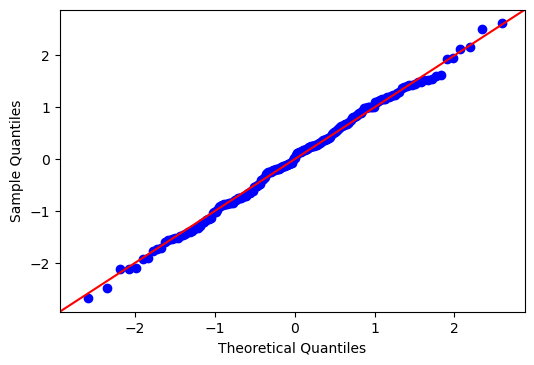

In [65]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Time')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 6, 0.05) 
print(chi2_pval)

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.3701195345798339 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

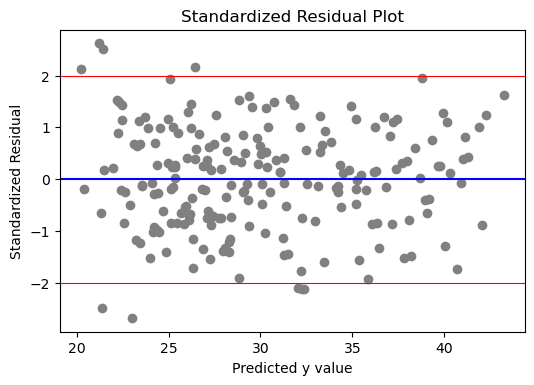

In [66]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

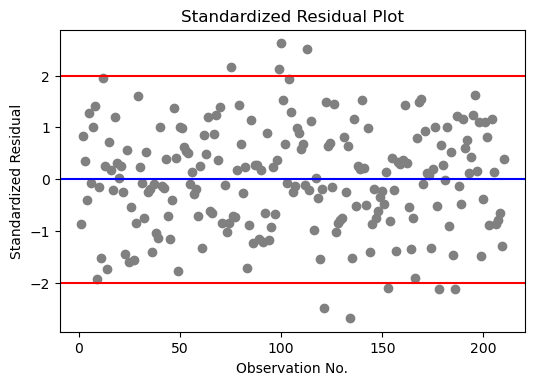

runs =  102
n1 =  105
n2 =  105
runs_exp =  106.0
stan_dev =  7.228333405962345
z =  -0.5533779054381429
pval_z =  0.5800046650090591
p_value for Z-statistic=  0.5800046650090591


In [67]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.5800046650090591 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
There is no multicollinearity issue in this model.

Left-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [68]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  210.06579776802883
size =  210
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          1.6903878  -0.48706327 -0.75651679  1.68432254 -1.34874958
  1.0731825   0.41388158 -3.3320197   1.76212945 -1.37232444  3.48381352
 -1.69336618 -1.99890179  2.44894689 -0.5380458  -0.38719266  1.41257228
 -0.87932764 -0.28817074  0.23087822 -0.51379636 -1.19208312  2.01558501
 -2.167

(T = 210, K = 5, alpha = 0.05): dl = 1.718 , du = 1.820<br>
du < d = 1.8952571830992155 < 2. Thus, there is not enough evidence to infer that first order auto-correlation exists.

All required conditions satisfied. The model is valid.

In [69]:
print("standard error = ", result_reg.mse_resid ** 0.5)
print("mean of y", data[:, 1].mean())
print("std of y", data[:, 1].std())
print("R-Squared = ", result_reg.rsquared)
print("Adjusted R-Squared = ", result_reg.rsquared_adj)
f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

standard error =  4.139085191391903
mean of y 29.990952380952383
std of y 6.931986868864755
R-Squared =  0.6536588135228745
Adjusted R-Squared =  0.6451700589523568
F value =  77.00291109759388
SSR =  6596.079460317461 df =  5.0 MSR =  1319.2158920634922
SSE =  3494.933349206348 df =  204.0 MSE =  17.132026221599745
F =  77.00291109759388
F test =  <F test: F=array([[77.0029111]]), p=4.497709775061984e-45, df_denom=204, df_num=5>


The standard error of estimate is 4.139085191391903.<br>
It seems that se is small compared to mean of y. We can conclude the model fits the data well.<br>

The coefficient of determination is 0.6536588135228745.<br>
65.3% of the variation in y is explained by this regression line of the independent variables.<br>

The coefficient of determination, adjusted for degrees of freedom is 0.6451700589523568.<br>
The adjusted coefficient of determination is 0.6451700589523568 is close to 0.6536588135228745 (<= 0.06), indicating that the model has no problem of over-fitting.<br>

Hypothesis:<br>
H0: All independent variables are equal to zero.<br>
H1: At least one independent variable is not equal to zero.<br>
The p-value = 4.497709775059942e-45 < 0.05, the null hypothesis is rejected. Thus, at least one independent variable is related to y. This regression model is valid.<br>

<h4>(d),(e),(f)

(d)Yes, since temperature has a positive coefficent, we acn infer that higher temperatures deplete chlorine more quickly.<br>
(e)Yes, since the scattered plot of PH level to chlorine depletion is a convex function, PH level ^ 2 has p-value < 0.05 conducted by T test in the regression table. There is evidence to infer that the belief about the relationship between chlorine depletion and pH level is correct.<br>
(f)No, we cannot. Since the p-values conducted by T test in the regression table > 0.05, we cannot infer that weather is a factor in chlorine depletion.